# Instagram Influencers _ Data Cleanup, Consolidation, & Tableau Preperation

#### Part I: Importing the libraries & pulling in the datasets.

In [662]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [663]:
df_data1 = pd.read_csv('data/top_200_instagrammers.csv')

In [664]:
df_data2 = pd.read_csv('data/Top_Influencers.csv')

#### Part II: Cleaning & consolidating the datasets.

In [665]:
pd.set_option('display.max_columns', None)

df_data1.head()

,Username,Channel Name,Country,Url,Main topic,Main video category,Likes,Likes Avg.,Posts,Followers,Boost Index,Comments Avg.,Views Avg.,Avg. 1 Day,Avg. 3 Day,Avg. 7 Day,Avg. 14 Day,Avg. 30 Day,Engagement Rate,Engagement Rate (60 Days)
0,cristiano,cristiano,ES,https://www.instagram.com/cristiano,Sports,Sports,2.287645e+10,8.671953e+06,3328,465027234,92,51758.330927,1.700949e+07,NaN,NaN,3321113.0,5.327340e+06,6.948659e+06,0.014916,0.015903
1,kyliejenner,kyliejenner,US,https://www.instagram.com/kyliejenner,NaN,NaN,4.304855e+10,8.296736e+06,6921,356687629,91,47534.120961,2.287547e+07,NaN,NaN,1223002.0,2.196528e+06,4.692459e+06,0.017617,0.016189
2,leomessi,leomessi,NaN,https://www.instagram.com/leomessi,NaN,NaN,4.670492e+09,6.895178e+06,875,347032978,90,47044.540305,1.176160e+07,NaN,4810554.0,3199807.0,5.359469e+06,5.668454e+06,0.015534,0.019045
3,selenagomez,selenagomez,US,https://www.instagram.com/selenagomez,NaN,NaN,8.442643e+09,6.252711e+06,1835,334551681,93,39167.115727,1.072397e+07,NaN,NaN,NaN,2.340219e+06,2.340219e+06,0.013913,0.007720
4,therock,therock,US,https://www.instagram.com/therock,NaN,NaN,9.562231e+09,1.874151e+06,6660,327064138,91,8529.747043,5.413831e+06,NaN,NaN,713970.0,1.101339e+06,1.165227e+06,0.004426,0.003723


In [666]:
df_data1.shape

(200, 20)

In [667]:
df_data2.head()

,Rank,Channel Info,Influence Score,Followers,Avg. Likes,Posts,60-Day Eng Rate,New Post Avg. Likes,Total Likes,Country Or Region
0,1,\ncristiano,92,485.2m,8.7m,3.4k,0.013,6.3m,29.1b,Spain
1,2,kyliejenner,91,370.7m,8.2m,7.0k,0.014,5.0m,57.4b,United States
2,3,\nleomessi,90,363.9m,6.7m,915,0.010,3.5m,6.1b,NaN
3,4,\nselenagomez,93,348.8m,6.1m,1.9k,0.005,1.7m,11.4b,United States
4,5,\ntherock,91,339.4m,1.8m,6.8k,0.003,932.0k,12.6b,United States


In [668]:
df_data2.shape

(200, 10)

###### ** Both datasets have 200 rows. Dataset 1 has 20 columns and dataset 2 has 10 columns.

In [669]:
df_data1.dtypes

Username                      object
Channel Name                  object
Country                       object
Url                           object
Main topic                    object
Main video category           object
Likes                        float64
Likes Avg.                   float64
Posts                          int64
Followers                      int64
Boost Index                    int64
Comments Avg.                float64
Views Avg.                   float64
Avg. 1 Day                   float64
Avg. 3 Day                   float64
Avg. 7 Day                   float64
Avg. 14 Day                  float64
Avg. 30 Day                  float64
Engagement Rate              float64
Engagement Rate (60 Days)    float64
dtype: object

In [670]:
df_data2.dtypes

Rank                     int64
Channel Info            object
Influence Score          int64
Followers               object
Avg. Likes              object
Posts                   object
60-Day Eng Rate        float64
New Post Avg. Likes     object
Total Likes             object
Country Or Region       object
dtype: object

###### ** Channel Name and Channel Info can be consolidated bc they are both objects and both list the channel name. Have to change column names to match before combining.
###### ** Followers and Followers can be combined but only after converting both to int since its a number that we want to use for calculations. Have to change column names to match before combining.
###### ** Country and Country Or Region can be combined bc they are both objects and both list the country in which the insta influencer resides. Have to change column names to match before combining.
###### ** Likes Avg. and Avg. Likes can be combined but only after converting both to int since its a number that we want to use for calculations. Have to change column names to match before combining.
###### ** Posts and Posts can be combined but only after converting both to int since its a number that we want to use for calculations. Have to change column names to match before combining.
###### ** Engagement Rate (60 Days) & 60-Day Eng Rate can be combined bc both are floats and both list the 60 day engagement rate. Have to change column names to match before combining. 
###### ** Likes and Total Likes can cbe combined but only after converting both to int since its a number that we want to use for calculations. Have to change column names to match before combining.

In [671]:
# First, changing dtypes to match:

In [672]:
df_data2['Total Likes'] = pd.to_numeric(df_data2['Total Likes'].str.replace('[^\d.]', ''), errors='coerce').astype(float).astype('Int64')

In [673]:
df_data2['Followers'] = pd.to_numeric(df_data2['Followers'].str.replace('[^\d]', ''), errors='coerce').astype(float).astype('Int64')

In [674]:
df_data2['Avg. Likes'] = pd.to_numeric(df_data2['Avg. Likes'].astype(str).str.replace('[^\d]', ''), errors='coerce').astype(float).astype('Int64')

In [675]:
df_data2['Posts'] = pd.to_numeric(df_data2['Posts'].astype(str).str.replace('[^\d]', ''), errors='coerce').astype(float).astype('Int64')

In [676]:
df_data2['Total Likes'] = pd.to_numeric(df_data2['Total Likes'].astype(str).str.replace('[^\d]', ''), errors='coerce').astype(float).astype('Int64')

In [677]:
df_data1.dtypes

Username                      object
Channel Name                  object
Country                       object
Url                           object
Main topic                    object
Main video category           object
Likes                        float64
Likes Avg.                   float64
Posts                          int64
Followers                      int64
Boost Index                    int64
Comments Avg.                float64
Views Avg.                   float64
Avg. 1 Day                   float64
Avg. 3 Day                   float64
Avg. 7 Day                   float64
Avg. 14 Day                  float64
Avg. 30 Day                  float64
Engagement Rate              float64
Engagement Rate (60 Days)    float64
dtype: object

In [678]:
df_data2.dtypes

Rank                     int64
Channel Info            object
Influence Score          int64
Followers                Int64
Avg. Likes               Int64
Posts                    Int64
60-Day Eng Rate        float64
New Post Avg. Likes     object
Total Likes              Int64
Country Or Region       object
dtype: object

In [679]:
# Then, changing column names to match.

In [680]:
df_data1.rename(columns={
    'Likes': 'Total Likes',
    'Likes Avg.': 'Avg. Likes',
    'Engagement Rate (60 Days)': '60-Day Eng Rate',
    'Country': 'Country Or Region'
}, inplace=True)

In [681]:
df_data2.rename(columns={
    'Channel Info': 'Channel Name'
}, inplace=True)

In [682]:
df_data1

,Username,Channel Name,Country Or Region,Url,Main topic,Main video category,Total Likes,Avg. Likes,Posts,Followers,Boost Index,Comments Avg.,Views Avg.,Avg. 1 Day,Avg. 3 Day,Avg. 7 Day,Avg. 14 Day,Avg. 30 Day,Engagement Rate,60-Day Eng Rate
0,cristiano,cristiano,ES,https://www.instagram.com/cristiano,Sports,Sports,2.287645e+10,8.671953e+06,3328,465027234,92,51758.330927,1.700949e+07,NaN,NaN,3.321113e+06,5.327340e+06,6.948659e+06,0.014916,0.015903
1,kyliejenner,kyliejenner,US,https://www.instagram.com/kyliejenner,NaN,NaN,4.304855e+10,8.296736e+06,6921,356687629,91,47534.120961,2.287547e+07,NaN,NaN,1.223002e+06,2.196528e+06,4.692459e+06,0.017617,0.016189
2,leomessi,leomessi,NaN,https://www.instagram.com/leomessi,NaN,NaN,4.670492e+09,6.895178e+06,875,347032978,90,47044.540305,1.176160e+07,NaN,4.810554e+06,3.199807e+06,5.359469e+06,5.668454e+06,0.015534,0.019045
3,selenagomez,selenagomez,US,https://www.instagram.com/selenagomez,NaN,NaN,8.442643e+09,6.252711e+06,1835,334551681,93,39167.115727,1.072397e+07,NaN,NaN,NaN,2.340219e+06,2.340219e+06,0.013913,0.007720
4,therock,therock,US,https://www.instagram.com/therock,NaN,NaN,9.562231e+09,1.874151e+06,6660,327064138,91,8529.747043,5.413831e+06,NaN,NaN,7.139700e+05,1.101339e+06,1.165227e+06,0.004426,0.003723
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
195,luansantana,luansantana,BR,https://www.instagram.com/luansantana,NaN,NaN,1.121343e+08,2.055880e+05,714,33024460,79,4795.100970,5.287625e+05,NaN,2.110623e+05,1.293861e+05,1.938759e+05,1.824987e+05,0.005050,0.005092
196,danbilzerian,danbilzerian,CA,https://www.instagram.com/danbilzerian,Pets & Animals,Pets & Animals,2.355851e+09,2.044189e+06,1372,32938902,84,24680.813187,2.103653e+07,NaN,1.079742e+06,1.079742e+06,1.079742e+06,1.079742e+06,0.053036,0.033629
197,nickjonas,nickjonas,US,https://www.instagram.com/nickjonas,NaN,NaN,1.364537e+09,7.442257e+05,2315,32906383,78,2191.083551,1.089024e+06,NaN,6.552600e+04,6.552600e+04,6.552600e+04,3.396173e+05,0.017990,0.010766
198,gururandhawa,gururandhawa,US,https://www.instagram.com/gururandhawa,Education,Education,1.039639e+09,6.377582e+05,2140,32845959,83,3837.251476,2.267251e+06,NaN,2.182120e+05,2.324327e+05,3.073671e+05,2.898926e+05,0.015257,0.008365


In [683]:
df_data2

,Rank,Channel Name,Influence Score,Followers,Avg. Likes,Posts,60-Day Eng Rate,New Post Avg. Likes,Total Likes,Country Or Region
0,1,\ncristiano,92,<NA>,<NA>,<NA>,0.013,6.3m,<NA>,Spain
1,2,kyliejenner,91,<NA>,<NA>,<NA>,0.014,5.0m,<NA>,United States
2,3,\nleomessi,90,<NA>,<NA>,915,0.010,3.5m,<NA>,NaN
3,4,\nselenagomez,93,<NA>,<NA>,<NA>,0.005,1.7m,<NA>,United States
4,5,\ntherock,91,<NA>,<NA>,<NA>,0.003,932.0k,<NA>,United States
...,...,...,...,...,...,...,...,...,...,...
195,196,\nkhabib_nurmagomedov,63,<NA>,<NA>,<NA>,0.009,305.7k,<NA>,Russia
196,197,\ndanbilzerian,84,<NA>,<NA>,<NA>,0.064,2.1m,<NA>,Canada
197,198,\nraisa6690,80,<NA>,<NA>,<NA>,0.003,103.2k,<NA>,Indonesia
198,199,\nluansantana,79,<NA>,<NA>,865,0.003,82.6k,<NA>,Brazil


In [684]:
df_data1.dtypes

Username                object
Channel Name            object
Country Or Region       object
Url                     object
Main topic              object
Main video category     object
Total Likes            float64
Avg. Likes             float64
Posts                    int64
Followers                int64
Boost Index              int64
Comments Avg.          float64
Views Avg.             float64
Avg. 1 Day             float64
Avg. 3 Day             float64
Avg. 7 Day             float64
Avg. 14 Day            float64
Avg. 30 Day            float64
Engagement Rate        float64
60-Day Eng Rate        float64
dtype: object

In [685]:
df_data2.dtypes

Rank                     int64
Channel Name            object
Influence Score          int64
Followers                Int64
Avg. Likes               Int64
Posts                    Int64
60-Day Eng Rate        float64
New Post Avg. Likes     object
Total Likes              Int64
Country Or Region       object
dtype: object

In [686]:
# Combining the dataframes into a new dataframe.

In [687]:
# Converting 'Int64' to 'float64' in df_data2 for non-null values
df_data2['Followers'] = pd.to_numeric(df_data2['Followers'], errors='coerce')


In [688]:
# Convert 'Int64' to 'float64' in df_data2 for non-null values
df_data2['60-Day Eng Rate'] = pd.to_numeric(df_data2['60-Day Eng Rate'], errors='coerce').astype(float)

In [689]:
# Convert other 'Int64' columns to 'float64' in df_data2
df_data2['Avg. Likes'] = df_data2['Avg. Likes'].astype(float)
df_data2['Total Likes'] = df_data2['Total Likes'].astype(float)

In [690]:
df_data1[['Followers', 'Channel Name', 'Total Likes', 'Country Or Region', 'Avg. Likes', 'Posts', '60-Day Eng Rate']].dtypes

Followers              int64
Channel Name          object
Total Likes          float64
Country Or Region     object
Avg. Likes           float64
Posts                  int64
60-Day Eng Rate      float64
dtype: object

In [691]:
df_data2[['Followers', 'Channel Name', 'Total Likes', 'Country Or Region', 'Avg. Likes', 'Posts', '60-Day Eng Rate']].dtypes

Followers              Int64
Channel Name          object
Total Likes          float64
Country Or Region     object
Avg. Likes           float64
Posts                  Int64
60-Day Eng Rate      float64
dtype: object

In [692]:
df_data2['Followers'] = df_data2['Followers'].astype(float)

In [693]:
df_data2['Posts'] = df_data2['Posts'].astype(float)

In [694]:
# Creating "common colums" so that we can merge the columns and make a new dataset combining df1 and df2 with like columns being merged.

common_columns = ['Followers', 'Channel Name', 'Total Likes', 'Country Or Region', 'Avg. Likes', 'Posts', '60-Day Eng Rate']
merged_df = df_data1.merge(df_data2, how='outer', on=common_columns, suffixes=('_df1', '_df2'))

In [695]:
merged_df

,Username,Channel Name,Country Or Region,Url,Main topic,Main video category,Total Likes,Avg. Likes,Posts,Followers,Boost Index,Comments Avg.,Views Avg.,Avg. 1 Day,Avg. 3 Day,Avg. 7 Day,Avg. 14 Day,Avg. 30 Day,Engagement Rate,60-Day Eng Rate,Rank,Influence Score,New Post Avg. Likes
0,cristiano,cristiano,ES,https://www.instagram.com/cristiano,Sports,Sports,2.287645e+10,8.671953e+06,3328.0,465027234.0,92.0,51758.330927,1.700949e+07,NaN,NaN,3321113.0,5.327340e+06,6.948659e+06,0.014916,0.015903,NaN,NaN,NaN
1,kyliejenner,kyliejenner,US,https://www.instagram.com/kyliejenner,NaN,NaN,4.304855e+10,8.296736e+06,6921.0,356687629.0,91.0,47534.120961,2.287547e+07,NaN,NaN,1223002.0,2.196528e+06,4.692459e+06,0.017617,0.016189,NaN,NaN,NaN
2,leomessi,leomessi,NaN,https://www.instagram.com/leomessi,NaN,NaN,4.670492e+09,6.895178e+06,875.0,347032978.0,90.0,47044.540305,1.176160e+07,NaN,4810554.0,3199807.0,5.359469e+06,5.668454e+06,0.015534,0.019045,NaN,NaN,NaN
3,selenagomez,selenagomez,US,https://www.instagram.com/selenagomez,NaN,NaN,8.442643e+09,6.252711e+06,1835.0,334551681.0,93.0,39167.115727,1.072397e+07,NaN,NaN,NaN,2.340219e+06,2.340219e+06,0.013913,0.007720,NaN,NaN,NaN
4,therock,therock,US,https://www.instagram.com/therock,NaN,NaN,9.562231e+09,1.874151e+06,6660.0,327064138.0,91.0,8529.747043,5.413831e+06,NaN,NaN,713970.0,1.101339e+06,1.165227e+06,0.004426,0.003723,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
395,NaN,\nkhabib_nurmagomedov,Russia,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.009000,196.0,63.0,305.7k
396,NaN,\ndanbilzerian,Canada,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.064000,197.0,84.0,2.1m
397,NaN,\nraisa6690,Indonesia,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.003000,198.0,80.0,103.2k
398,NaN,\nluansantana,Brazil,NaN,NaN,NaN,NaN,NaN,865.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.003000,199.0,79.0,82.6k


In [696]:
merged_df.dtypes

Username                object
Channel Name            object
Country Or Region       object
Url                     object
Main topic              object
Main video category     object
Total Likes            float64
Avg. Likes             float64
Posts                  float64
Followers              float64
Boost Index            float64
Comments Avg.          float64
Views Avg.             float64
Avg. 1 Day             float64
Avg. 3 Day             float64
Avg. 7 Day             float64
Avg. 14 Day            float64
Avg. 30 Day            float64
Engagement Rate        float64
60-Day Eng Rate        float64
Rank                   float64
Influence Score        float64
New Post Avg. Likes     object
dtype: object

In [697]:
merged_df.shape

(400, 23)

In [698]:
# checking for nulls

In [699]:
merged_df.isnull().sum()

Username               200
Channel Name             0
Country Or Region      125
Url                    200
Main topic             270
Main video category    267
Total Likes            200
Avg. Likes             200
Posts                  146
Followers              200
Boost Index            200
Comments Avg.          200
Views Avg.             203
Avg. 1 Day             339
Avg. 3 Day             275
Avg. 7 Day             238
Avg. 14 Day            214
Avg. 30 Day            205
Engagement Rate        200
60-Day Eng Rate          0
Rank                   200
Influence Score        200
New Post Avg. Likes    200
dtype: int64

###### ** Since we are not modeling, I am not going to handle the nulls by replacing them with values. 
###### ** Instead, I am going to do some EDA t see if I notice any cool trends that I'd want to chart in Tableau and then I'll move into working on the Tableau Dash.

In [700]:
# Saving new dataframe

In [701]:
merged_df.to_csv('new_df.csv')

#### Part III: Exploratory Data Analysis

In [702]:
# Total Likes Distribution Plot:

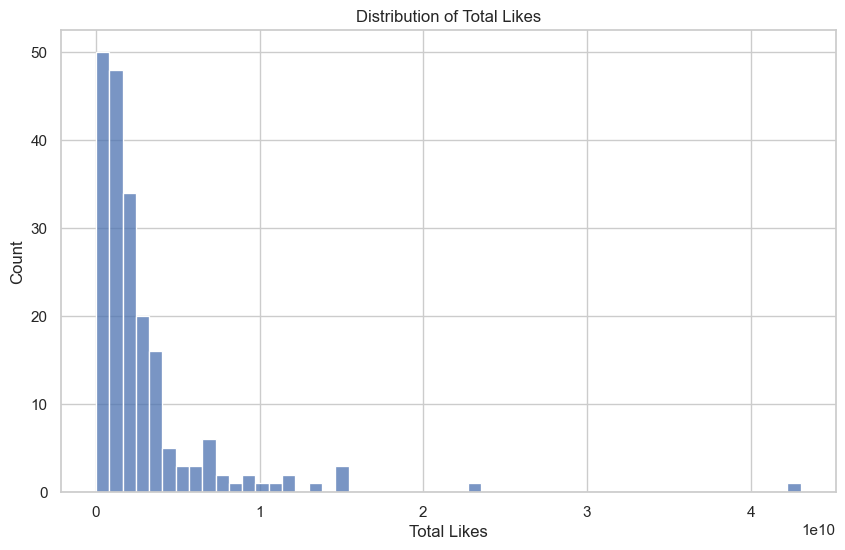

<Figure size 640x480 with 0 Axes>

In [703]:
plt.figure(figsize=(10, 6))

sns.histplot(data=merged_df,
             x='Total Likes');

plt.title('Distribution of Total Likes')
plt.show()

plt.savefig('images/distributionoftotallikes.png')

In [704]:
# Avg. Likes Distribution Plot:

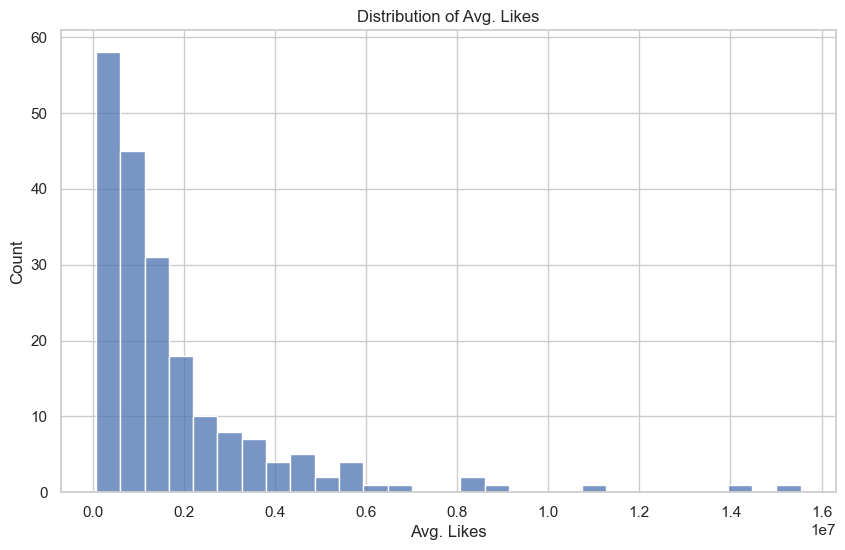

<Figure size 640x480 with 0 Axes>

In [705]:
plt.figure(figsize=(10, 6))

sns.histplot(data=merged_df,
             x='Avg. Likes');

plt.title('Distribution of Avg. Likes')
plt.show()

plt.savefig('images/distributionofavglikes.png')

In [706]:
# Posts Distribution Plot:

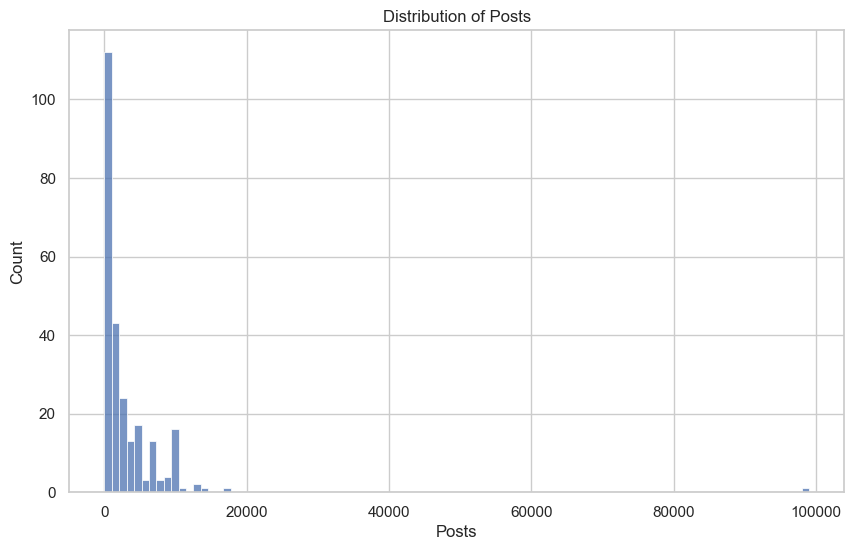

<Figure size 640x480 with 0 Axes>

In [707]:
plt.figure(figsize=(10, 6))

sns.histplot(data=merged_df,
             x='Posts');

plt.title('Distribution of Posts')
plt.show()

plt.savefig('images/distributionofposts.png')

In [708]:
# Followers Distribution Plot:

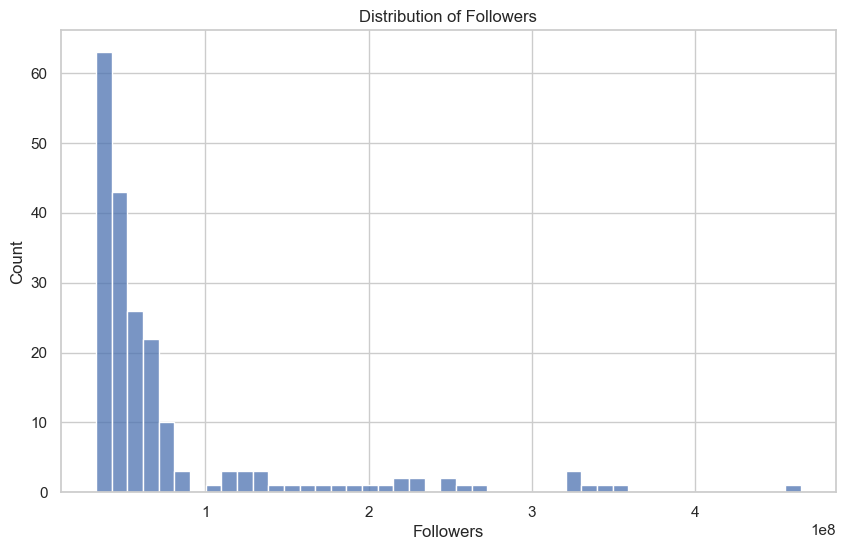

<Figure size 640x480 with 0 Axes>

In [709]:
plt.figure(figsize=(10, 6))

sns.histplot(data=merged_df,
             x='Followers');

plt.title('Distribution of Followers')
plt.show()

plt.savefig('images/distributionoffollowers.png')

In [710]:
# Boost Index Distribution Plot:

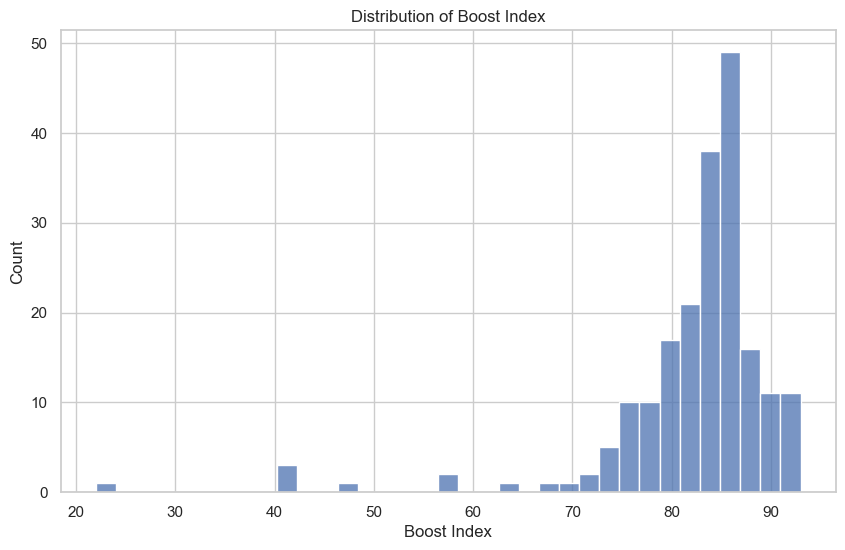

<Figure size 640x480 with 0 Axes>

In [711]:
plt.figure(figsize=(10, 6))

sns.histplot(data=merged_df,
             x='Boost Index');

plt.title('Distribution of Boost Index')
plt.show()

plt.savefig('images/distributionofboostindex.png')

In [712]:
# Comments Avg. Distribution Plot:

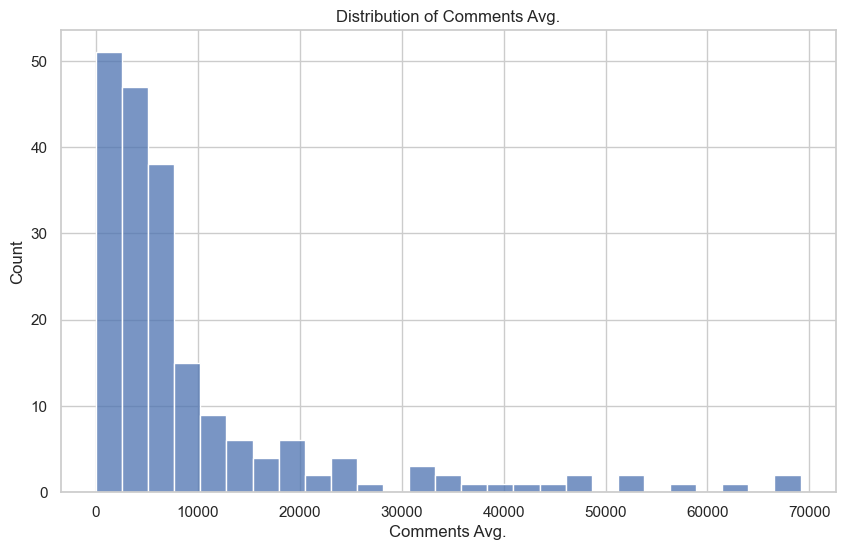

<Figure size 640x480 with 0 Axes>

In [713]:
plt.figure(figsize=(10, 6))

sns.histplot(data=merged_df,
             x='Comments Avg.');

plt.title('Distribution of Comments Avg.')
plt.show()

plt.savefig('images/distributionofcommentsavg.png')

In [714]:
# Views Avg. Distribution Plot:

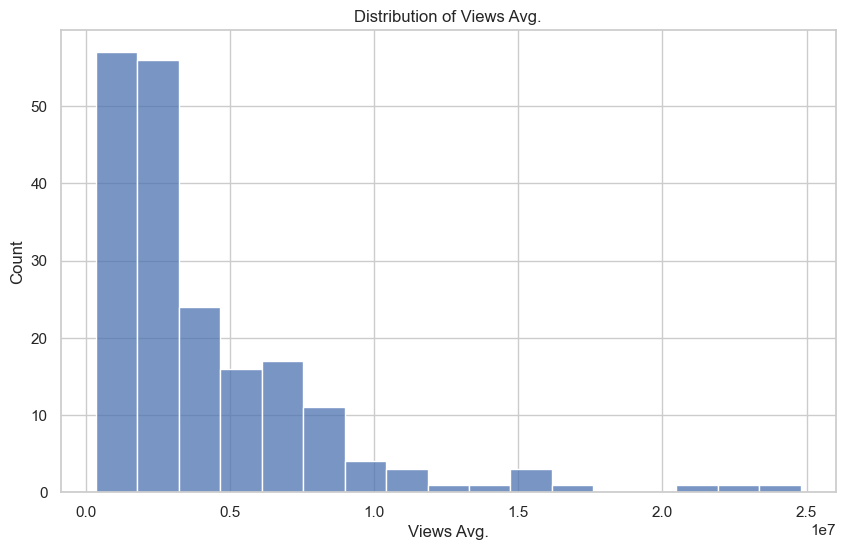

<Figure size 640x480 with 0 Axes>

In [715]:
plt.figure(figsize=(10, 6))

sns.histplot(data=merged_df,
             x='Views Avg.');

plt.title('Distribution of Views Avg.')
plt.show()

plt.savefig('images/distributionofviewsavg.png')

In [716]:
# Engagement Rate Distribution Plot:

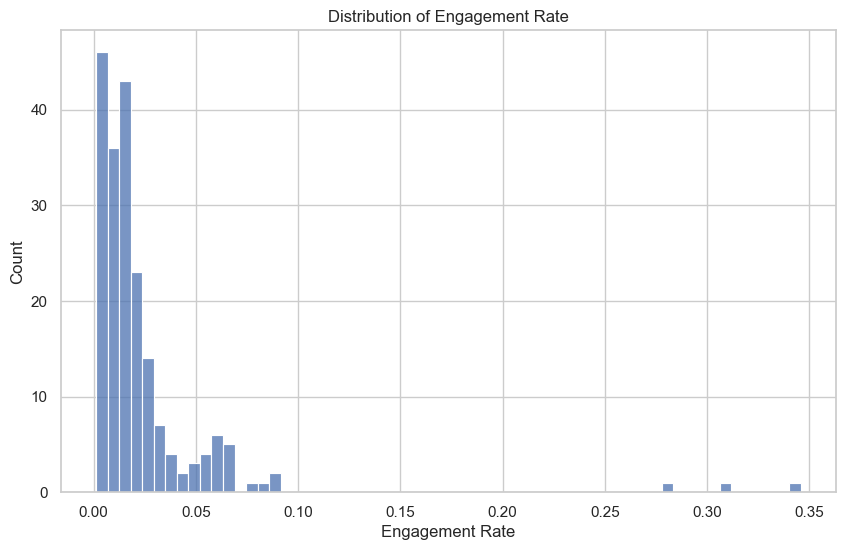

<Figure size 640x480 with 0 Axes>

In [717]:
plt.figure(figsize=(10, 6))

sns.histplot(data=merged_df,
             x='Engagement Rate');

plt.title('Distribution of Engagement Rate')
plt.show()

plt.savefig('images/distributionofengagementrate.png')

In [718]:
# 60-Day Eng Rate Distribution Plot:

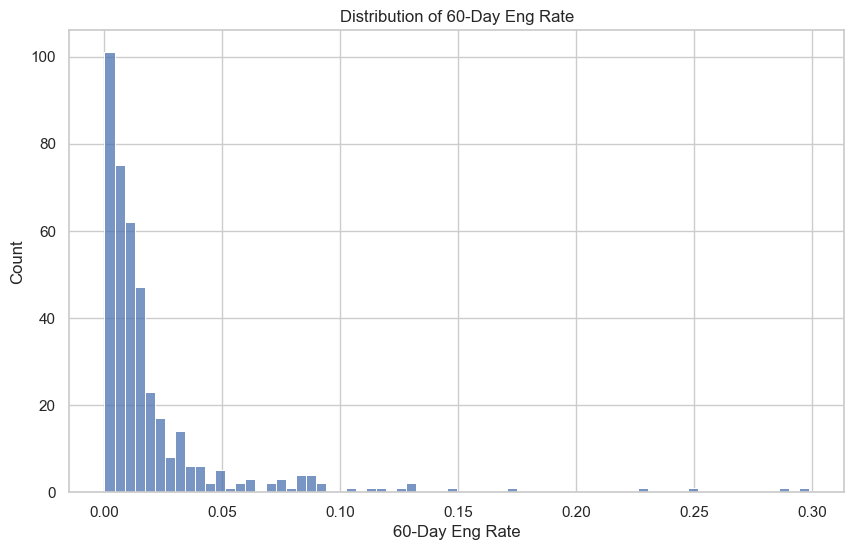

<Figure size 640x480 with 0 Axes>

In [719]:
plt.figure(figsize=(10, 6))

sns.histplot(data=merged_df,
             x='60-Day Eng Rate');

plt.title('Distribution of 60-Day Eng Rate')
plt.show()

plt.savefig('images/distributionof60dayengrate.png')

In [720]:
# Rank Distribution Plot:

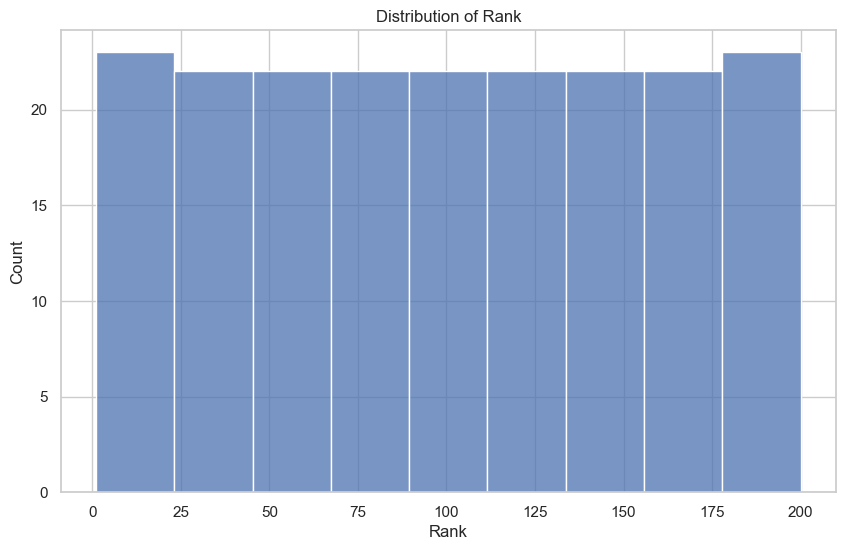

<Figure size 640x480 with 0 Axes>

In [721]:
plt.figure(figsize=(10, 6))

sns.histplot(data=merged_df,
             x='Rank');

plt.title('Distribution of Rank')
plt.show()

plt.savefig('images/distributionofrank.png')

In [722]:
# Influence Score Distribution Plot:

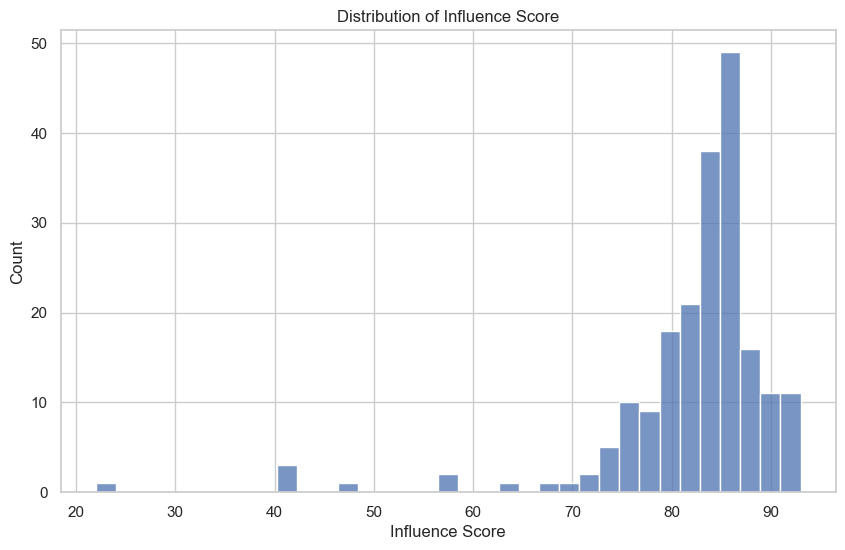

<Figure size 640x480 with 0 Axes>

In [723]:
plt.figure(figsize=(10, 6))

sns.histplot(data=merged_df,
             x='Influence Score');
             
plt.title('Distribution of Influence Score')
plt.show()

plt.savefig('images/distributionofinfluencescore.png')

In [724]:
# Correlation Heatmap

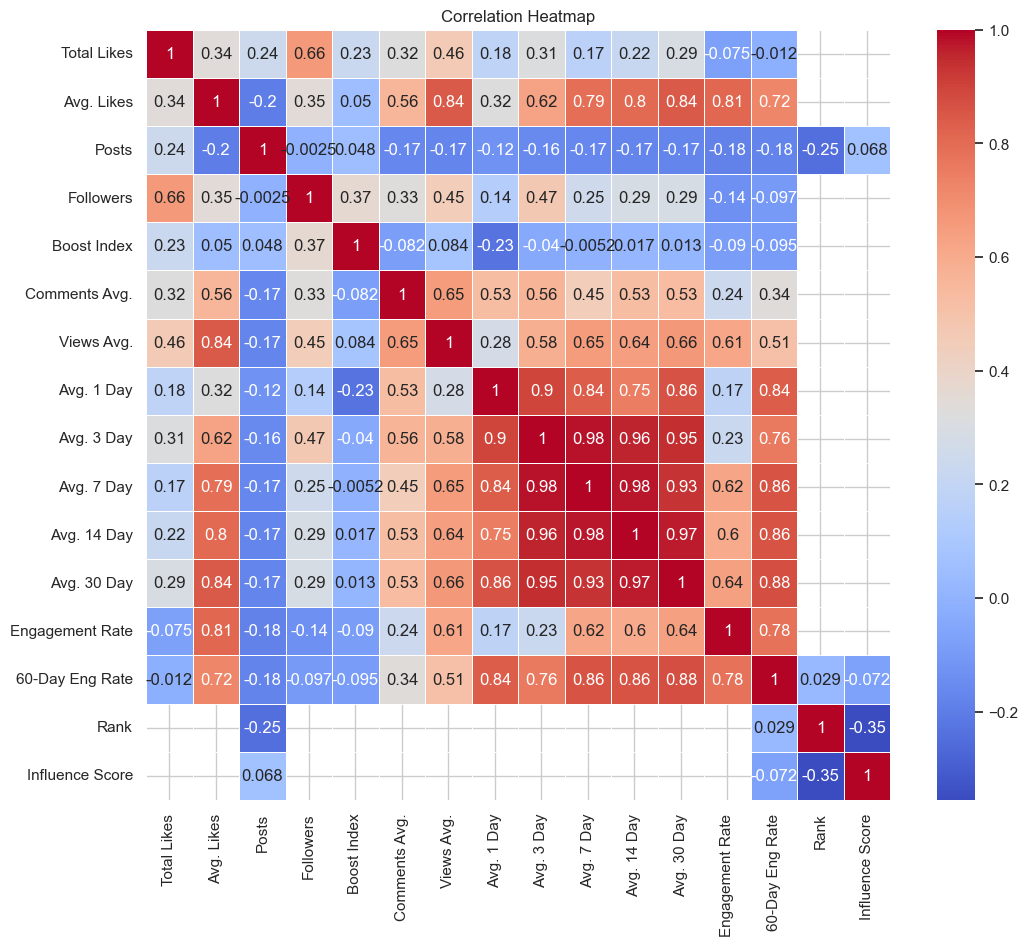

<Figure size 640x480 with 0 Axes>

In [725]:
numeric_columns = merged_df.select_dtypes(include=['float64', 'int64'])

plt.figure(figsize=(12, 10))

corr_matrix = numeric_columns.corr()

sns.heatmap(corr_matrix,
            annot=True,
            cmap='coolwarm',
            linewidths=0.5)

plt.title('Correlation Heatmap')
plt.show()

plt.savefig('images/correlationheatmap.png')

In [726]:
# Count Plot Country Or Region

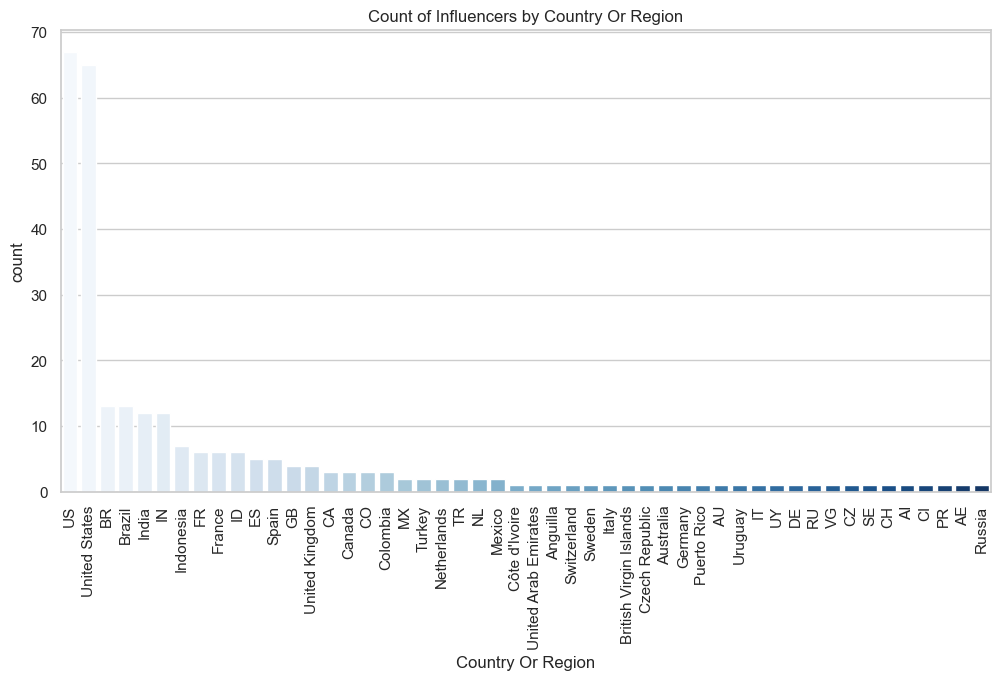

<Figure size 640x480 with 0 Axes>

In [727]:
plt.figure(figsize=(12, 6))

sns.countplot(data=merged_df, x='Country Or Region',
              order=merged_df['Country Or Region'].value_counts().index,
              palette='Blues');

plt.title('Count of Influencers by Country Or Region')

plt.xticks(rotation=90)
plt.show()

plt.savefig('images/countofinfluencersbycountry.png')

In [728]:
# Realizing I need to combine some of these value counts as the abbrevition can be merged with the country name in a lot of cases.

In [729]:
unique_countries = merged_df['Country Or Region'].unique()

In [730]:
unique_countries

array(['ES', 'US', nan, 'CA', 'BR', 'NL', 'GB', 'IN', 'UY', 'TR', 'ID',
       'CO', 'FR', 'AU', 'IT', 'AE', 'PR', 'CI', 'AI', 'CH', 'SE', 'CZ',
       'VG', 'MX', 'RU', 'DE', 'Spain', 'United States', 'Canada',
       'Brazil', 'Netherlands', 'United Kingdom', 'India', 'Uruguay',
       'Turkey', 'Indonesia', 'Colombia', 'France', 'Australia', 'Italy',
       'United Arab Emirates', 'Puerto Rico', "Côte d'Ivoire", 'Anguilla',
       'Switzerland', 'Sweden', 'British Virgin Islands',
       'Czech Republic', 'Mexico', 'Germany', 'Russia'], dtype=object)

In [731]:
reverse_country_mapping = {
    'US': 'United States',
    'ES': 'Spain',
    'CA': 'Canada',
    'BR': 'Brazil',
    'NL': 'Netherlands',
    'GB': 'United Kingdom',
    'IN': 'India',
    'UY': 'Uruguay',
    'TR': 'Turkey',
    'ID': 'Indonesia',
    'CO': 'Columbia',
    'FR': 'France',
    'AU': 'Australia',
    'IT': 'Italy',
    'AE': 'United Arab Emirates',
    'PR': 'Puerto Rico',
    "CI": "Côte d'Ivoire",
    'AI': 'Anguilla',
    'CH': 'Switzerland',
    'SE': 'Sweden',
    'CZ': 'Czechia',
    'VG': 'British Virgin Islands',
    'MX': 'Mexico',
    'RU': 'Russia',
    'DE': 'Germany'}

In [732]:
merged_df['Country Or Region'] = merged_df['Country Or Region'].replace(reverse_country_mapping)

In [733]:
unique_countries = merged_df['Country Or Region'].unique()

In [734]:
unique_countries

array(['Spain', 'United States', nan, 'Canada', 'Brazil', 'Netherlands',
       'United Kingdom', 'India', 'Uruguay', 'Turkey', 'Indonesia',
       'Columbia', 'France', 'Australia', 'Italy', 'United Arab Emirates',
       'Puerto Rico', "Côte d'Ivoire", 'Anguilla', 'Switzerland',
       'Sweden', 'Czechia', 'British Virgin Islands', 'Mexico', 'Russia',
       'Germany', 'Colombia', 'Czech Republic'], dtype=object)

In [735]:
# Realizing I should probably do the same thing for influencer channel names if needed

In [736]:
unique_influencers = merged_df['Channel Name'].unique()

In [737]:
unique_influencers

array(['cristiano', 'kyliejenner', 'leomessi', 'selenagomez', 'therock',
       'kimkardashian', 'arianagrande', 'beyonce', 'khloekardashian',
       'kendalljenner', 'justinbieber', 'natgeo', 'nike', 'taylorswift',
       'jlo', 'virat.kohli', 'nickiminaj', 'kourtneykardash',
       'mileycyrus', 'neymarjr', 'katyperry', 'kevinhart4real', 'zendaya',
       'iamcardib', 'ddlovato', 'badgalriri', 'kingjames', 'theellenshow',
       'realmadrid', 'champagnepapi', 'chrisbrownofficial', 'fcbarcelona',
       'billieeilish', 'dualipa', 'gal_gadot', 'vindiesel',
       'priyankachopra', 'lalalalisa_m', 'nasa', 'Shakira', 'gigihadid',
       'snoopdogg', 'davidbeckham', 'shraddhakapoor', 'victoriassecret',
       'k.mbappe', 'nehakakkar', 'shawnmendes', 'nba', 'narendramodi',
       'jennierubyjane', 'deepikapadukone', 'tomholland2013',
       'aliaabhatt', 'ronaldinho', 'emmawatson', 'bts.bighitofficial',
       'katrinakaif', 'justintimberlake', 'marvel', 'camila_cabello',
       'willsmith

In [738]:
# Removing leading whitespaces and standardizing capitalization
merged_df['Channel Name'] = merged_df['Channel Name'].str.strip().str.lower()

In [739]:
# Checking for unique usernames after standardization
unique_usernames = merged_df['Channel Name'].unique()
unique_usernames

array(['cristiano', 'kyliejenner', 'leomessi', 'selenagomez', 'therock',
       'kimkardashian', 'arianagrande', 'beyonce', 'khloekardashian',
       'kendalljenner', 'justinbieber', 'natgeo', 'nike', 'taylorswift',
       'jlo', 'virat.kohli', 'nickiminaj', 'kourtneykardash',
       'mileycyrus', 'neymarjr', 'katyperry', 'kevinhart4real', 'zendaya',
       'iamcardib', 'ddlovato', 'badgalriri', 'kingjames', 'theellenshow',
       'realmadrid', 'champagnepapi', 'chrisbrownofficial', 'fcbarcelona',
       'billieeilish', 'dualipa', 'gal_gadot', 'vindiesel',
       'priyankachopra', 'lalalalisa_m', 'nasa', 'shakira', 'gigihadid',
       'snoopdogg', 'davidbeckham', 'shraddhakapoor', 'victoriassecret',
       'k.mbappe', 'nehakakkar', 'shawnmendes', 'nba', 'narendramodi',
       'jennierubyjane', 'deepikapadukone', 'tomholland2013',
       'aliaabhatt', 'ronaldinho', 'emmawatson', 'bts.bighitofficial',
       'katrinakaif', 'justintimberlake', 'marvel', 'camila_cabello',
       'willsmith

In [740]:
new_merged_df = merged_df.groupby('Channel Name').sum().reset_index()

In [741]:
new_merged_df

,Channel Name,Username,Country Or Region,Url,Main topic,Main video category,Total Likes,Avg. Likes,Posts,Followers,Boost Index,Comments Avg.,Views Avg.,Avg. 1 Day,Avg. 3 Day,Avg. 7 Day,Avg. 14 Day,Avg. 30 Day,Engagement Rate,60-Day Eng Rate,Rank,Influence Score,New Post Avg. Likes
0,433,433,NetherlandsNetherlands,https://www.instagram.com/433,0,0,7.235187e+09,8.634482e+05,10319.0,50846051.0,79.0,4092.410533,3.232600e+06,519454.20,6.609231e+05,6.962332e+05,7.306245e+05,8.104614e+05,0.013870,0.035295,96.0,79.0,826.2k
1,5-minute crafts girly,5.min.crafts,United StatesUnited States,https://www.instagram.com/5.min.crafts,Trailers,Trailers,1.741363e+09,1.574992e+05,14519.0,46618064.0,85.0,342.393615,1.289002e+06,0.00,9.366600e+03,1.067833e+04,1.429065e+04,1.392567e+04,0.002579,0.001340,122.0,85.0,60.4k
2,9gag,9gag,United States,https://www.instagram.com/9gag,Pets & Animals,Pets & Animals,5.062668e+09,6.787113e+05,10021.0,58181054.0,86.0,5559.041481,3.613240e+06,202474.75,2.274771e+05,2.217436e+05,2.585828e+05,2.689793e+05,0.008779,0.004668,0.0,0.0,0
3,addisonraee,addisonraee,0,https://www.instagram.com/addisonraee,Gaming,Gaming,7.312062e+08,3.150451e+06,626.0,40402560.0,85.0,8362.427152,6.400652e+06,0.00,1.349907e+06,1.009004e+06,1.026147e+06,1.214530e+06,0.060824,0.055012,155.0,85.0,851.5k
4,adele,adele,United StatesUnited States,https://www.instagram.com/adele,0,0,1.411416e+09,4.739484e+06,841.0,50542177.0,84.0,32030.802817,1.539618e+07,0.00,2.211066e+06,2.766306e+06,2.392644e+06,2.392644e+06,0.067521,0.092149,101.0,84.0,1.6m
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
202,worldstar,worldstar,United StatesUnited States,https://www.instagram.com/worldstar,Comedy,Comedy,1.158924e+10,1.575462e+05,99022.0,37818287.0,78.0,2493.199621,1.056852e+06,35157.00,5.258280e+04,7.420832e+04,7.268365e+04,7.153115e+04,0.003166,0.003961,159.0,78.0,84.4k
203,zacefron,zacefron,United StatesUnited States,https://www.instagram.com/zacefron,Movies,Movies,1.081307e+09,2.262104e+06,1332.0,53887887.0,86.0,9847.057143,5.708581e+06,0.00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.030471,0.052730,82.0,86.0,1.7m
204,zayn,zayn,United StatesUnited States,https://www.instagram.com/zayn,0,Gaming & Apps,5.701936e+08,4.713926e+06,327.0,46197756.0,82.0,69133.050000,8.478670e+06,0.00,0.000000e+00,4.037963e+06,4.037963e+06,3.600000e+06,0.077751,0.169353,119.0,82.0,3.9m
205,zendaya,zendaya,United StatesUnited States,https://www.instagram.com/zendaya,0,0,1.472709e+10,5.744110e+06,3537.0,147816903.0,87.0,16106.142857,7.685348e+06,0.00,0.000000e+00,3.970268e+06,3.958943e+06,4.755622e+06,0.028354,0.105179,23.0,87.0,7.5m


In [742]:
new_merged_df.to_csv('final_influencers_new_merged_df.csv')

In [743]:
# Count Plot Main video category:

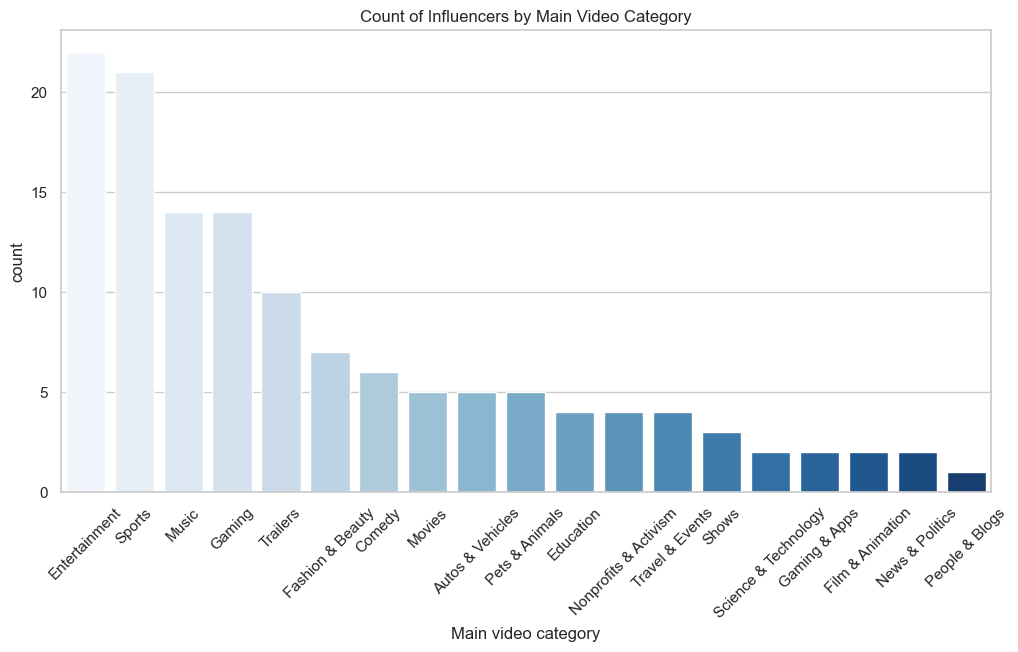

<Figure size 640x480 with 0 Axes>

In [744]:
plt.figure(figsize=(12, 6))

sns.countplot(data=merged_df,
              x='Main video category',
              order=merged_df['Main video category'].value_counts().index,
              palette='Blues');
              
plt.title('Count of Influencers by Main Video Category')
              
plt.xticks(rotation=45)
plt.show()

plt.savefig('images/countofinfluencersbymainvideocategory.png')

In [745]:
# Count Plot Main topic:

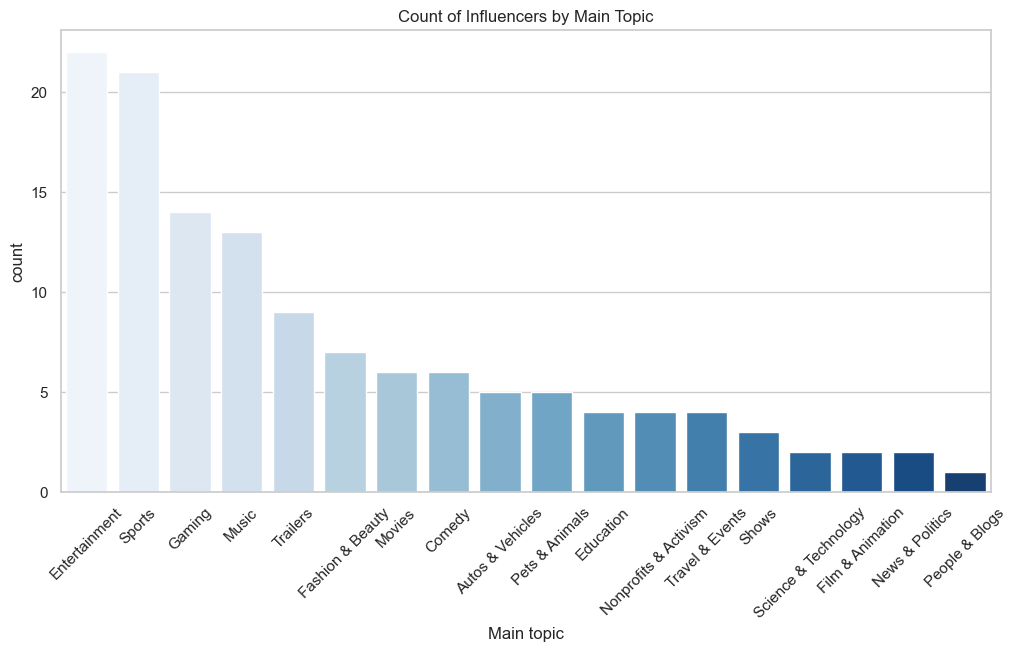

<Figure size 640x480 with 0 Axes>

In [746]:
plt.figure(figsize=(12, 6))

sns.countplot(data=merged_df,
              x='Main topic',
              order=merged_df['Main topic'].value_counts().index,
              palette='Blues')

plt.title('Count of Influencers by Main Topic')

plt.xticks(rotation=45)
plt.show()

plt.savefig('images/countofinfluencersbymaintopic.png')

In [747]:
# Box Plot Total Likes:

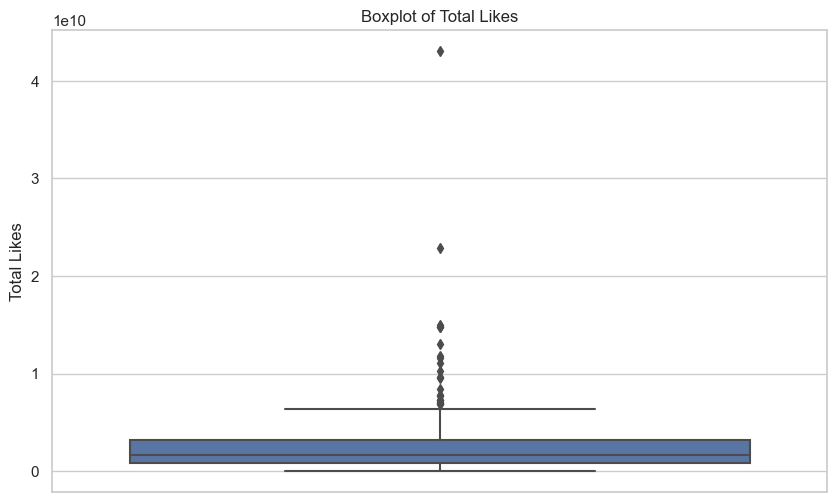

<Figure size 640x480 with 0 Axes>

In [748]:
plt.figure(figsize=(10, 6))

sns.boxplot(data=merged_df,
            y='Total Likes')

plt.title('Boxplot of Total Likes')
plt.show()

plt.savefig('images/boxplotoftotallikes.png')

In [749]:
# Box Plot Avg. Likes:

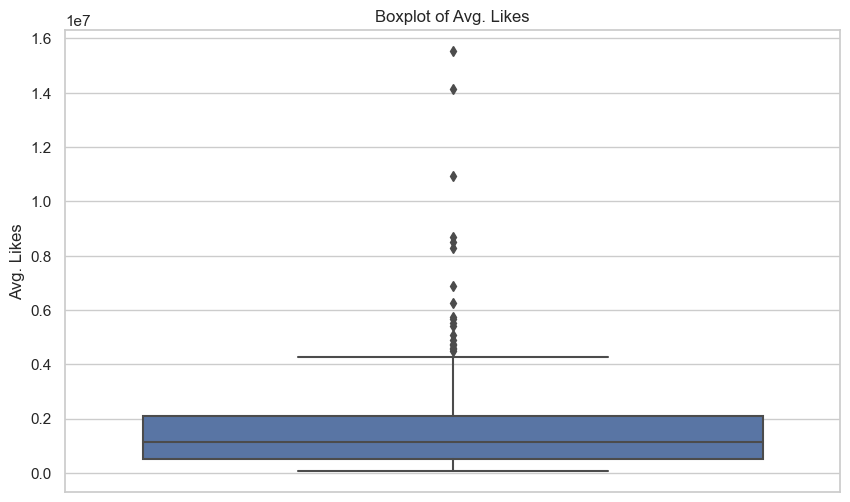

<Figure size 640x480 with 0 Axes>

In [750]:
plt.figure(figsize=(10, 6))

sns.boxplot(data=merged_df,
            y='Avg. Likes')

plt.title('Boxplot of Avg. Likes')
plt.show()

plt.savefig('images/boxplotofavglikes.png')

In [751]:
# Box Plot Posts:

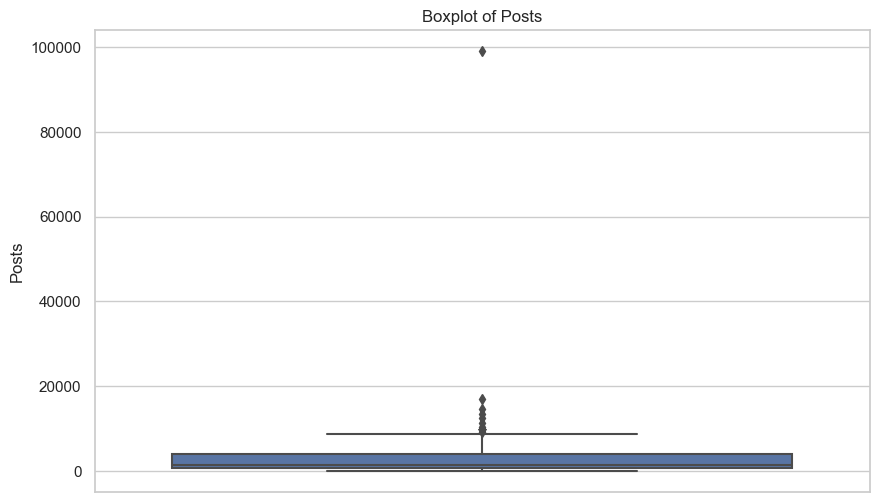

<Figure size 640x480 with 0 Axes>

In [752]:
plt.figure(figsize=(10, 6))

sns.boxplot(data=merged_df,
            y='Posts')

plt.title('Boxplot of Posts')
plt.show()

plt.savefig('images/boxplotofposts.png')

In [753]:
# Box Plot Followers:

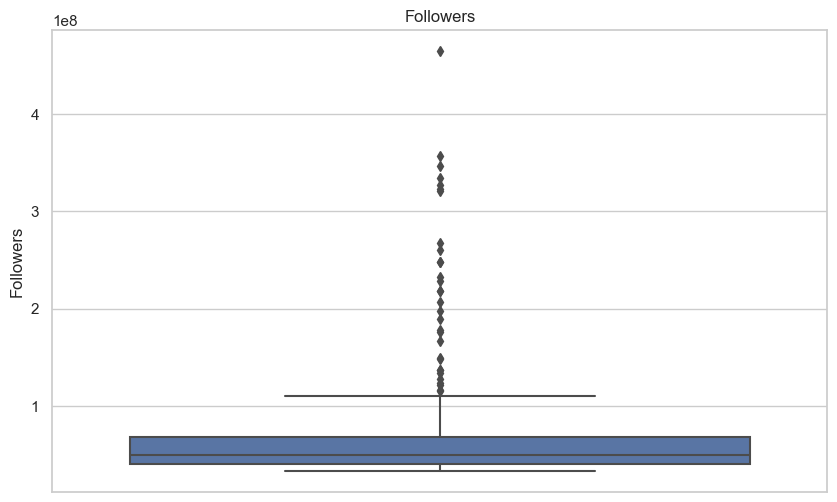

<Figure size 640x480 with 0 Axes>

In [754]:
plt.figure(figsize=(10, 6))

sns.boxplot(data=merged_df,
            y='Followers')

plt.title('Followers')
plt.show()

plt.savefig('images/boxplotoffollowers.png')

In [755]:
# Box Plot Boost Index:

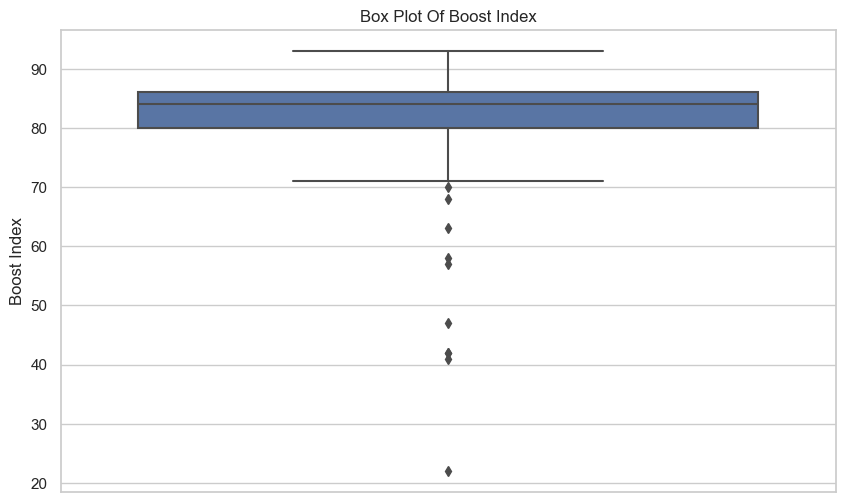

<Figure size 640x480 with 0 Axes>

In [756]:
plt.figure(figsize=(10, 6))

sns.boxplot(data=merged_df,
            y='Boost Index')

plt.title('Box Plot Of Boost Index')
plt.show()

plt.savefig('images/boxplotofboostindex.png')

In [757]:
# Box Plot Comments Avg:

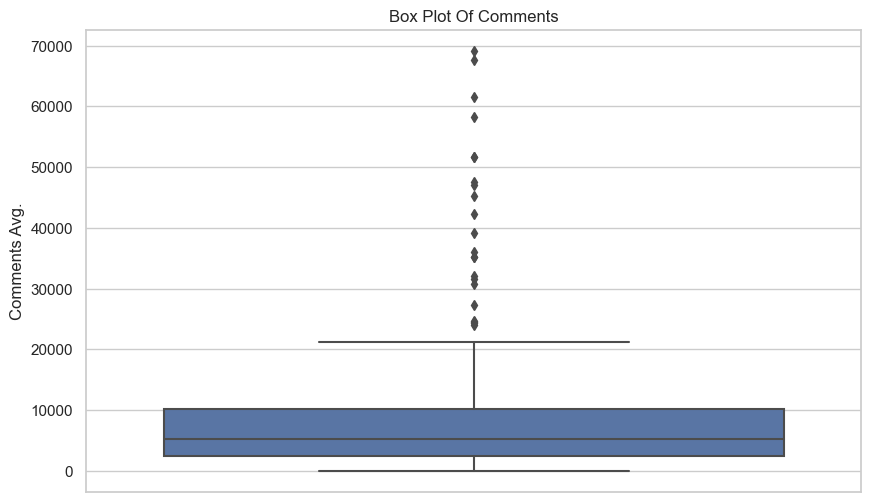

<Figure size 640x480 with 0 Axes>

In [758]:
plt.figure(figsize=(10, 6))

sns.boxplot(data=merged_df,
            y='Comments Avg.')

plt.title('Box Plot Of Comments')
plt.show()

plt.savefig('images/boxplotofcomments.png')

In [759]:
# Box Plot Views Avg:

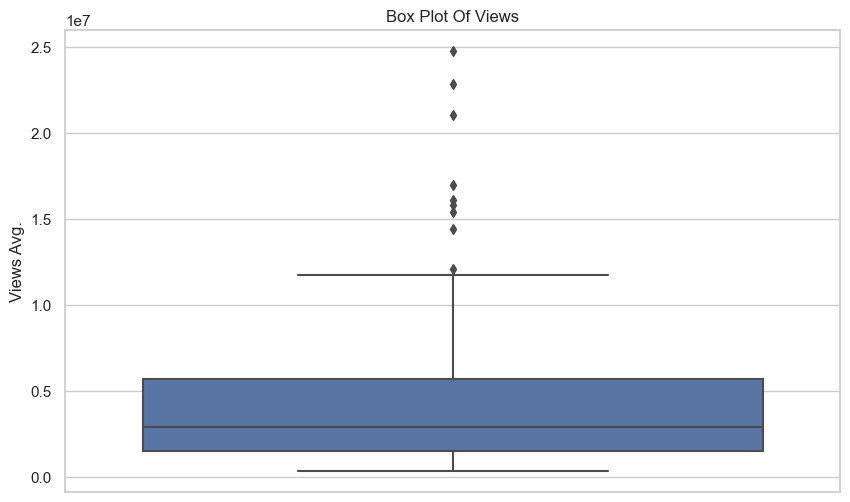

<Figure size 640x480 with 0 Axes>

In [760]:
plt.figure(figsize=(10, 6))

sns.boxplot(data=merged_df,
            y='Views Avg.')

plt.title('Box Plot Of Views')
plt.show()

plt.savefig('images/boxplotofviews.png')

#### Part III: Tableau Dash (see Tableau)